In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/regression.csv")

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_ssc = StandardScaler()
x_scaled = x_ssc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y.values, test_size=0.2, shuffle=True)

In [3]:
w = np.zeros(x.shape[-1])
b = np.array([0])

In [4]:
print("x_train.shape : ",x_train.shape)
print("y_train.shape : ",y_train.shape)
print("w.shape : ",w.shape)
print("b.shape : ",b.shape)

x_train.shape :  (353, 10)
y_train.shape :  (353,)
w.shape :  (10,)
b.shape :  (1,)


In [5]:
def my_model(x, w, b):
    y_pred = x.dot(w) + b
    return y_pred

def linear_regression_loss_function(y_real, y_pred):
    loss = ((y_real - y_pred) ** 2).mean()
    return loss

def get_derivative_of_cost_w(y_real, y_pred, x_real):
    derivative_of_cost_w = -2 * (y_real - y_pred).dot(x_real)
    return derivative_of_cost_w

def get_derivative_of_cost_b(y_real, y_pred):
    derivative_of_cost_b = -2 * (y_real - y_pred).sum()
    return derivative_of_cost_b


In [6]:
learning_rate = 1e-5

for i in range(3000):
    y_pred = my_model(x_train, w, b)
    loss = linear_regression_loss_function(y_train, y_pred)

    derivative_cost_w = get_derivative_of_cost_w(y_train, y_pred, x_train)
    derivative_cost_b = get_derivative_of_cost_b(y_train, y_pred)

    if i % 100 == 0:
        print(f"{i}/100")
        print(f"loss : {loss}")

    w = w - learning_rate * derivative_cost_w
    b = b - learning_rate * derivative_cost_b

0/100
loss : 28431.492917847027
100/100
loss : 8736.945677414935
200/100
loss : 4228.682027467749
300/100
loss : 3135.5897902301263
400/100
loss : 2866.102888523083
500/100
loss : 2797.92590310476
600/100
loss : 2779.8817913937232
700/100
loss : 2774.727837237759
800/100
loss : 2773.0760144702176
900/100
loss : 2772.4627704828704
1000/100
loss : 2772.1965450961447
1100/100
loss : 2772.0626418697534
1200/100
loss : 2771.9854960152747
1300/100
loss : 2771.9349571110056
1400/100
loss : 2771.897713037572
1500/100
loss : 2771.86746059616
1600/100
loss : 2771.8410767276455
1700/100
loss : 2771.816964806568
1800/100
loss : 2771.794286985174
1900/100
loss : 2771.772591309469
2000/100
loss : 2771.751625489499
2100/100
loss : 2771.7312422145246
2200/100
loss : 2771.711350388518
2300/100
loss : 2771.691889739705
2400/100
loss : 2771.6728174536033
2500/100
loss : 2771.6541010439164
2600/100
loss : 2771.6357144851677
2700/100
loss : 2771.617636064916
2800/100
loss : 2771.599847151241
2900/100
loss 

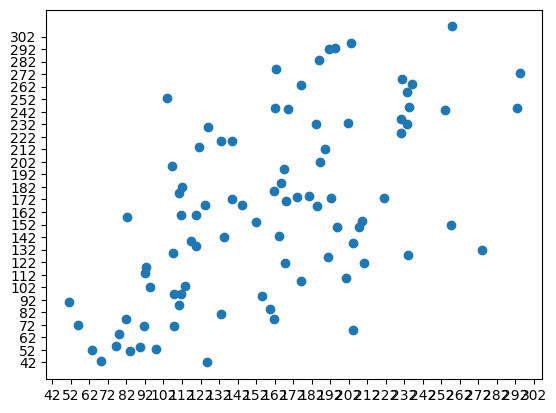

In [7]:
y_pred = x_test.dot(w) + b
plt.scatter(y_pred, y_test)
plt.xticks(range(int(min(y_test)), int(max(y_test)), 10))
plt.yticks(range(int(min(y_test)), int(max(y_test)), 10))
plt.show()